In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


# Load CSV file
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Explore the data
# print(df.head())  # View first few rows
# print(df.info())  # Get data type and null value information
# print(df.describe())  # Get summary statistics

In [49]:
#1

# Check for missing values
missing_values = df.isnull().sum()
#print(missing_values)

# Handle missing values by dropping rows with missing values
df = df.dropna()  # Drop rows with missing values

# Convert date columns to DateTime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')  # Assuming date format is day-month-year

# Convert object attributes to numeric values
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')  # Convert 'Education' column to numeric, with NaN for non-numeric values

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
[nan]


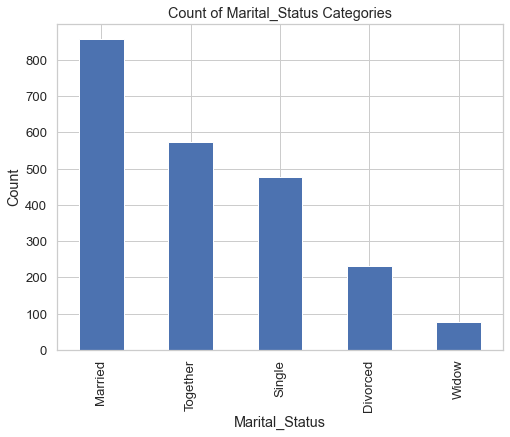

In [50]:
#2

# Print unique values in 'Marital_Status' and 'Education' columns
print(df['Marital_Status'].unique()) 
print(df['Education'].unique())

# Replace specific values in 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

# Plot count of values in each category using bar chart
plt.figure(figsize=(8, 6))
df['Marital_Status'].value_counts().plot(kind='bar')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Count of Marital_Status Categories')
plt.show()

In [51]:
#3

# Convert 'Dt_Customer' column to DateTime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Recency'] = pd.to_datetime(df['Recency'])

# Calculate 'Customer_For' attribute as number of days since last recorded date (Recency)
last_date = df['Recency'].max()
df['Customer_For'] = (last_date - df['Recency']).dt.days

# Calculate 'Age' attribute based on 'Year_Birth'
current_year = dt.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Calculate 'Spent' attribute as total amount spent in all categories over two years
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
              df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Create 'Children' attribute to declare set of children in a household
df['Children'] = df['Kidhome'] + df['Teenhome']

# Create 'Family_Size' attribute as total number of people in a household
df['Family_Size'] = df['Children'] + 1

# Create 'Is_Parent' attribute to indicate if a client is a parent
df['Is_Parent'] = df['Children'].apply(lambda x: True if x > 0 else False)

# Create 'Living_With' attribute to extract marital status of couples
df['Living_With'] = df['Marital_Status'].apply(lambda x: 'Partner' if 'together' in x.lower() else 'Alone')

# Create 'Age_Group' attribute to group ages into predefined categories
bins = [20, 30, 40, 50, 60, 70, 80, 200]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Print the updated DataFrame with new attributes
print(df.head())

     ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957        NaN         Single  58138.0        0         0   
1  2174        1954        NaN         Single  46344.0        1         1   
2  4141        1965        NaN       Together  71613.0        0         0   
3  6182        1984        NaN       Together  26646.0        1         0   
4  5324        1981        NaN        Married  58293.0        1         0   

  Dt_Customer                       Recency  MntWines  ...  Z_Revenue  \
0  2012-09-04 1970-01-01 00:00:00.000000058       635  ...         11   
1  2014-03-08 1970-01-01 00:00:00.000000038        11  ...         11   
2  2013-08-21 1970-01-01 00:00:00.000000026       426  ...         11   
3  2014-02-10 1970-01-01 00:00:00.000000026        11  ...         11   
4  2014-01-19 1970-01-01 00:00:00.000000094       173  ...         11   

   Response  Customer_For  Age  Spent  Children  Family_Size  Is_Parent  \
0         1            

In [52]:
# 4
# Define the column for which you want to detect outliers
column_name = 'Age'  # Replace with the name of the column you want to check

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows with outlier values
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Remove the rows with outlier values from the DataFrame
df = df[~((df[column_name] < lower_bound) | (df[column_name] > upper_bound))]

# Print the updated DataFrame without outliers
#print(df.head())

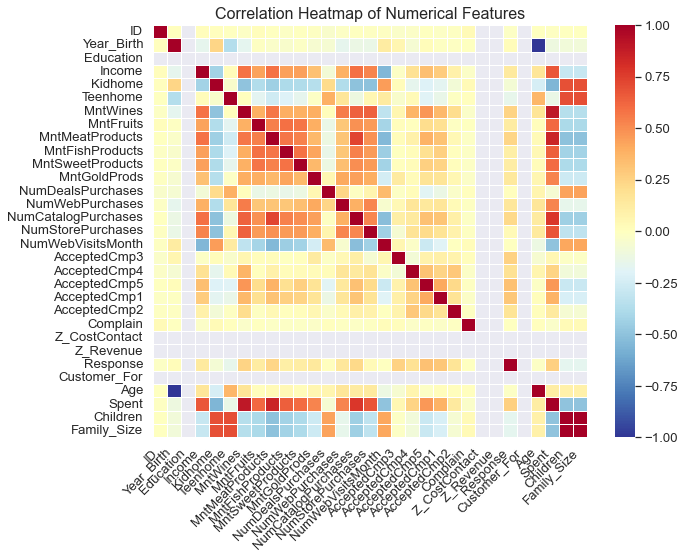

In [53]:
#5

# Extract numerical features
numerical_features = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap with improved visual appearance
sns.set(font_scale=1.2)  # Increase font size
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(correlation_matrix, cmap='RdYlBu_r', annot=False, fmt='.2f', linewidths=0.5, annot_kws={"fontsize": 12})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)  # Add title and increase font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust spacing for better layout
plt.show()

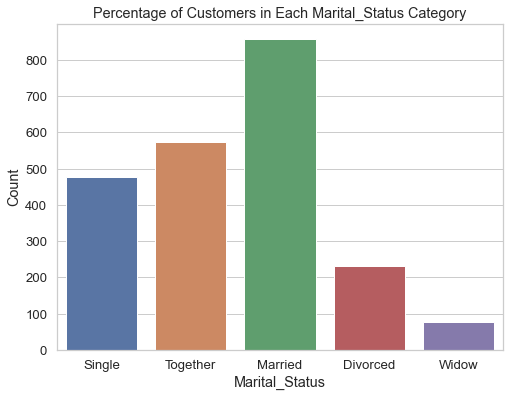

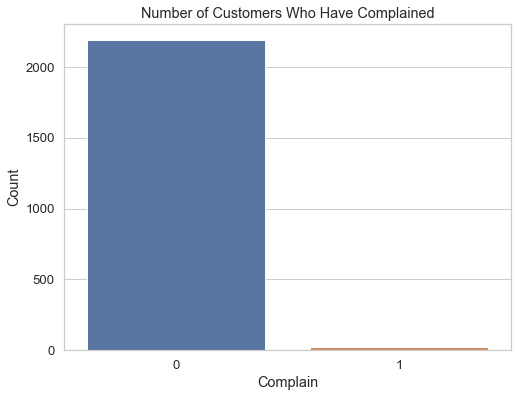

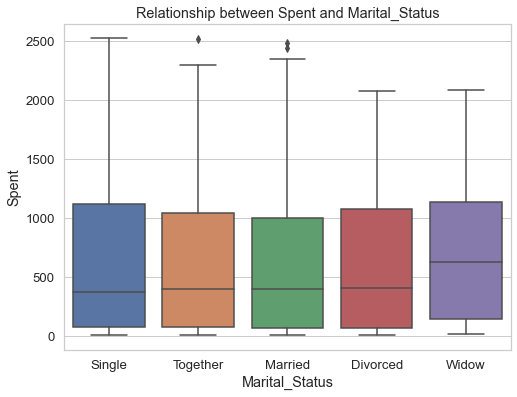

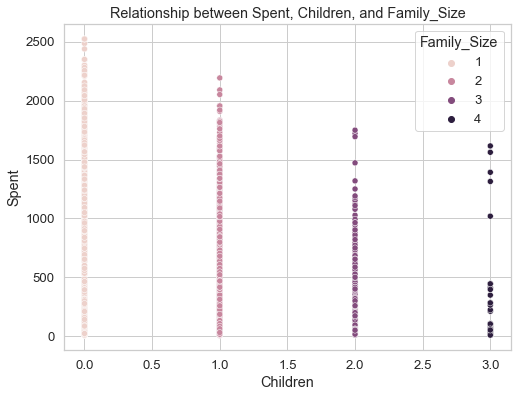

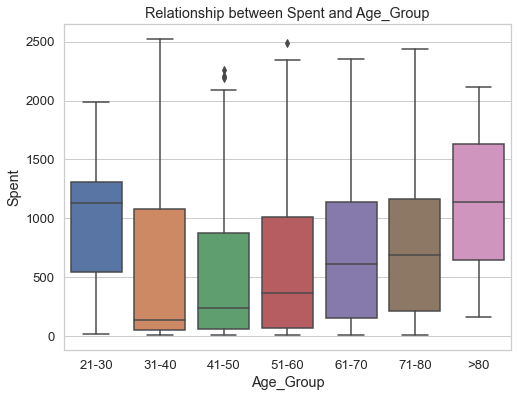

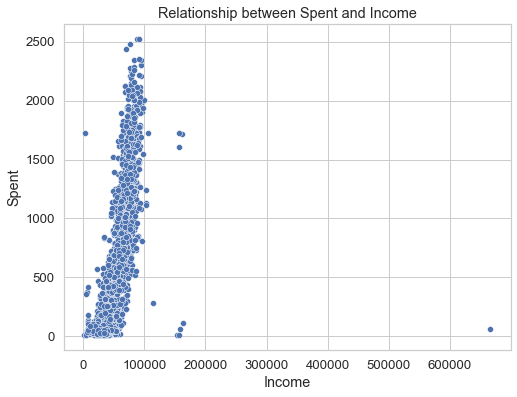

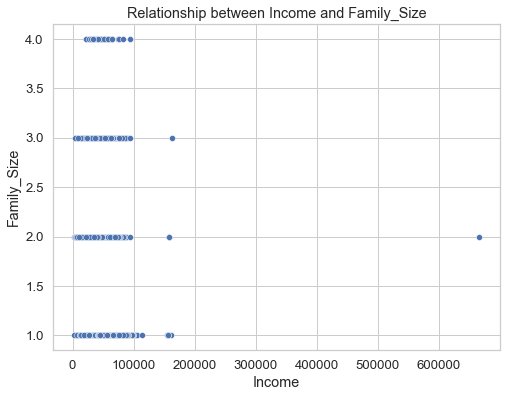

In [54]:
#6

# 1. Which Marital_Status category does the largest percentage of its customers belong to?
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x="Marital_Status", data=df)
plt.title("Percentage of Customers in Each Marital_Status Category")
plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.show()

# 2. How many customers have complained?
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x="Complain", data=df)
plt.title("Number of Customers Who Have Complained")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.show()

# 3. Relationship between number of purchases Spent and marital status.
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(x="Marital_Status", y="Spent", data=df)
plt.title("Relationship between Spent and Marital_Status")
plt.xlabel("Marital_Status")
plt.ylabel("Spent")
plt.show()

# 4. The relationship between the number of purchases Spent and the number of children and family size.
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Children", y="Spent", hue="Family_Size", data=df)
plt.title("Relationship between Spent, Children, and Family_Size")
plt.xlabel("Children")
plt.ylabel("Spent")
plt.show()

# 5. What does Age Group have to do with the Spent characteristic of shopping?
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(x="Age_Group", y="Spent", data=df)
plt.title("Relationship between Spent and Age_Group")
plt.xlabel("Age_Group")
plt.ylabel("Spent")
plt.show()

# 6. What does Income have to do with the Spent characteristic of markets?
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Income", y="Spent", data=df)
plt.title("Relationship between Spent and Income")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.show()


# 8. What is the relationship between income and family size?
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Income", y="Family_Size", data=df)
plt.title("Relationship between Income and Family_Size")
plt.xlabel("Income")
plt.ylabel("Family_Size")
plt.show()

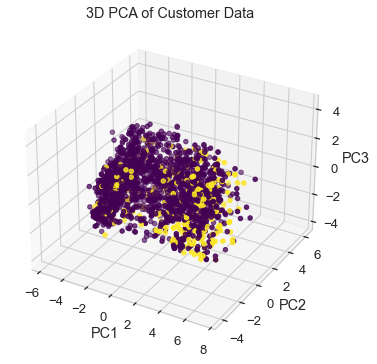

In [55]:
# Convert categorical features to numerical using one hot encoding
cat_cols = ['Education', 'Marital_Status', 'Living_With']
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

# Create a copy of the dataframe with only numerical columns and drop the target column
temp = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                  'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], 
                 axis=1)


# Copy the DataFrame and select only the numerical columns
num_df = temp.select_dtypes(include=['int', 'float']).copy()

#print(num_df.head())

# Standardize the data
scaler = StandardScaler()
num_df_std = scaler.fit_transform(num_df)

# Perform PCA with n_components=3
pca = PCA(n_components=3)
pca.fit(num_df_std)
pca_df = pca.transform(num_df_std)


# visualize the 3-dimensional projection of the result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=df['Response'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA of Customer Data')
plt.show()




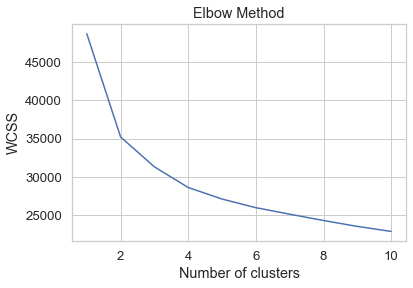

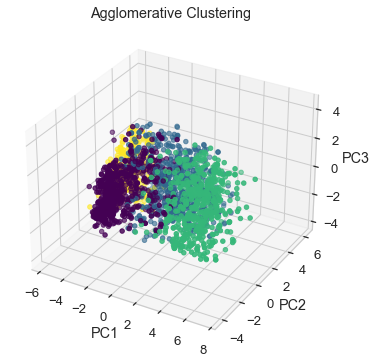

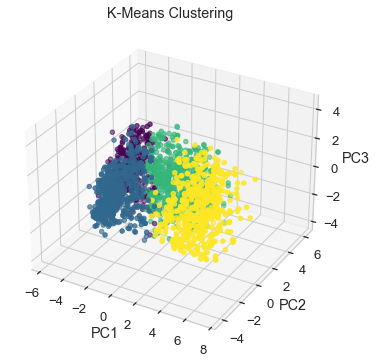

In [59]:
# Perform Elbow method to determine number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(num_df_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(num_df_std)

# Perform K-Means Clustering
kmeans_clustering = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans_clustering.fit_predict(num_df_std)

# Plot the formed clusters using PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=agg_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Agglomerative Clustering')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('K-Means Clustering')
plt.show()
